In [1]:
import pandas as pd

In [2]:
test_df = pd.read_csv('E:\\python\\2.PROJECTS\\loan\\data\\test.csv')
train_df = pd.read_csv('E:\\python\\2.PROJECTS\\loan\\data\\test.csv')

In [3]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [5]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cat_cols = train_df.select_dtypes(include='object').columns
num_cols = train_df.select_dtypes(exclude='object').columns

In [8]:
num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
train_df.person_income.value_counts()

person_income
60000    2871
50000    1974
30000    1414
40000    1347
70000    1175
         ... 
69936       1
61150       1
72984       1
64320       1
70399       1
Name: count, Length: 2196, dtype: int64

<Axes: xlabel='person_income', ylabel='loan_int_rate'>

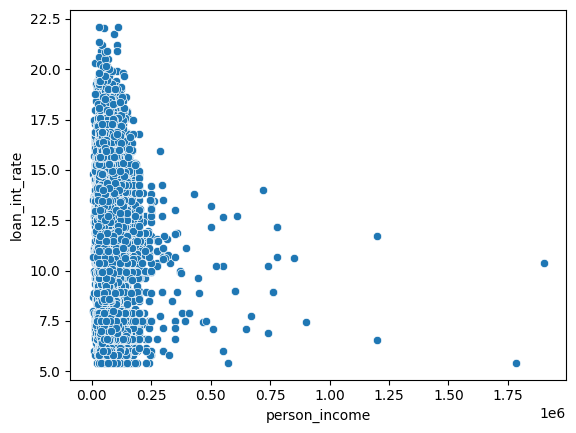

In [10]:
sns.scatterplot(data=train_df,x='person_income',y='loan_int_rate')

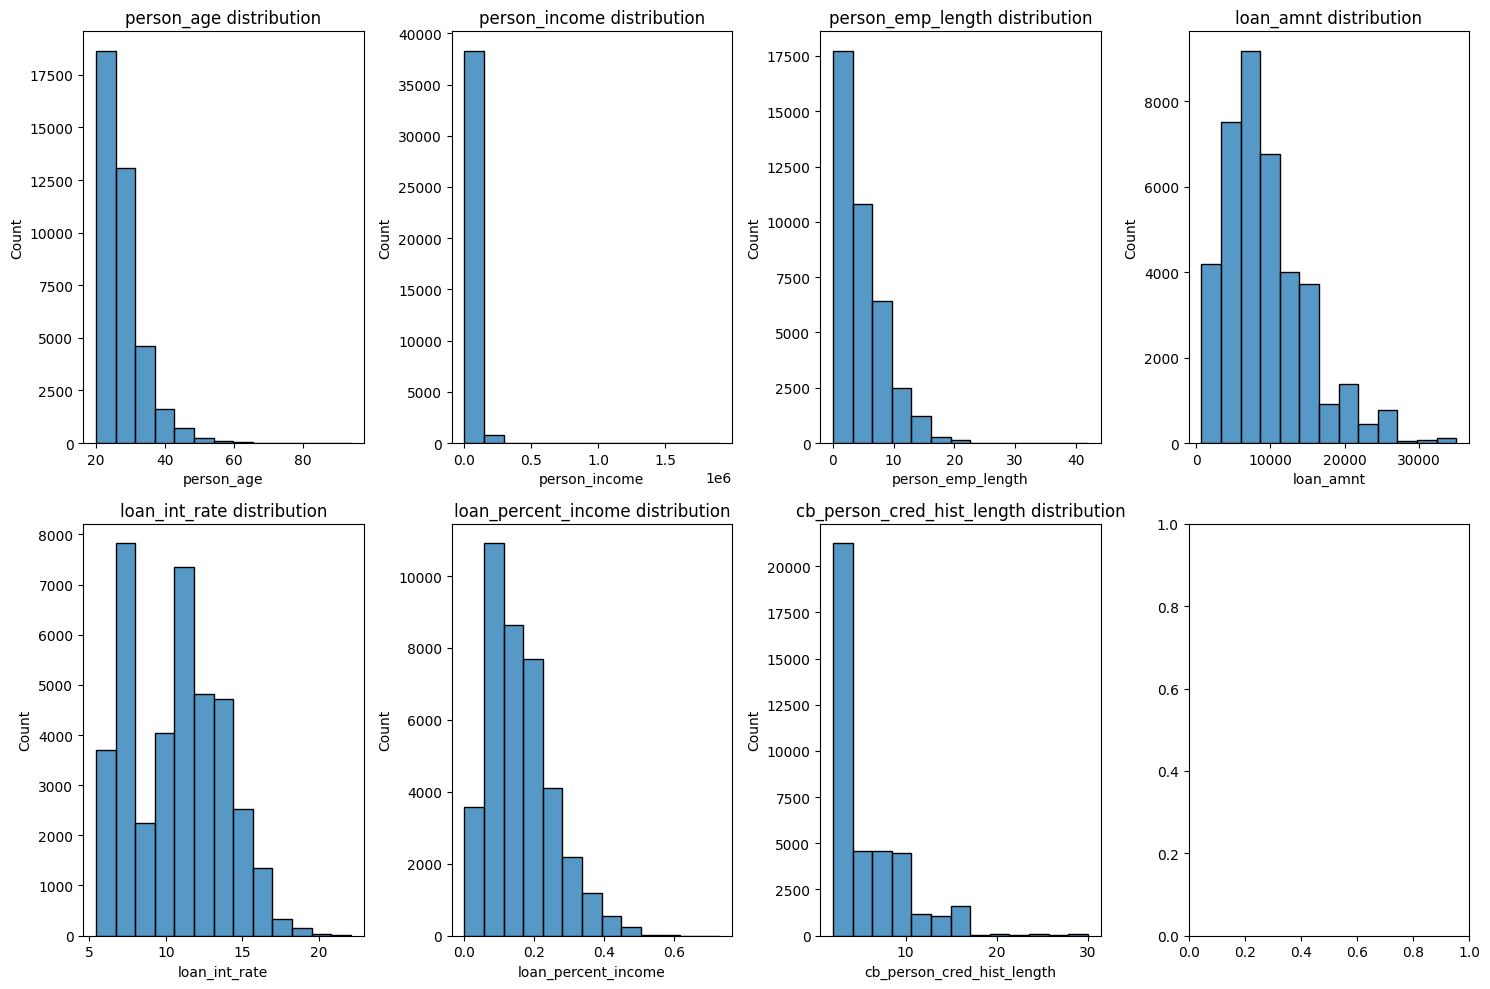

In [29]:
_,ax = plt.subplots(nrows=2,ncols=4,figsize=(15,10))

for idx,col in enumerate(num_cols):
  r= idx//4
  c=  idx%4
  # print(r,c)
  sns.histplot(data=train_df,x=col,ax=ax[r][c],bins=13)
  ax[r][c].set_title(f"{col} distribution")
  plt.tight_layout()


In [18]:
for col in num_cols: 
    print(f"skewness of {col}",train_df[col].skew())
    print(f"kurtosis of {col}",train_df[col].kurt())

skewness of person_age 1.9424885122594298
kurtosis of person_age 5.6744533381677495
skewness of person_income 10.446479614755289
kurtosis of person_income 337.29215043588596
skewness of person_emp_length 1.1638142907269031
kurtosis of person_emp_length 2.076518648374931
skewness of loan_amnt 1.2044130464855602
kurtosis of loan_amnt 1.7847058290907065
skewness of loan_int_rate 0.18534683042026848
kurtosis of loan_int_rate -0.7436083586066502
skewness of loan_percent_income 0.9390939217296116
kurtosis of loan_percent_income 0.7190068564963674
skewness of cb_person_cred_hist_length 1.6541300285878897
kurtosis of cb_person_cred_hist_length 3.676817374052899


64.53571324050851 9.688307777202584e-15


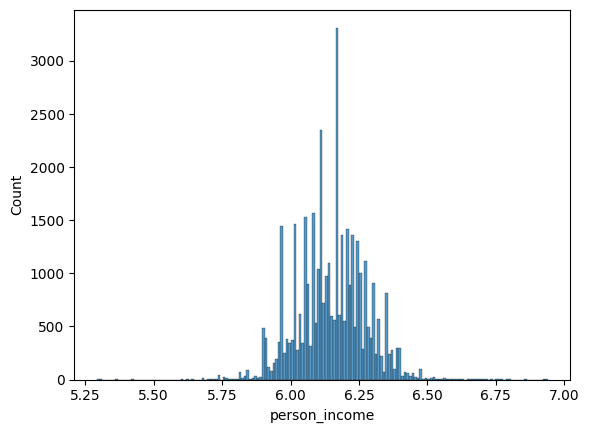

In [20]:
import numpy as np
df = train_df.copy()
# df['person_income'] = np.log(df['person_income']+1)
# sns.histplot(data=df,x='person_income')

from scipy.stats import boxcox
df['person_income'], lambda_ = boxcox(df['person_income'] + 1)
sns.histplot(data=df,x='person_income')

from scipy.stats import normaltest
sampled_df = df.sample(n=10000, random_state=42)
# Perform D'Agostino's K-squared Test
stat, p_value = normaltest(sampled_df['person_income'])
print(stat, p_value)

In [26]:
from scipy.stats import normaltest
results = {}
df = train_df.sample(n=2000, random_state=42)
for col in num_cols:
    stat, p = normaltest(df[col].dropna())  # Drop NaN values
    print(f"{col}= stats: {stat}, p_value: {p}  ")


person_age= stats: 669.1565976482132, p_value: 4.948699194344026e-146  
person_income= stats: 954.9218098239669, p_value: 4.37888633559177e-208  
person_emp_length= stats: 364.12174592061905, p_value: 8.55002732811327e-80  
loan_amnt= stats: 461.49447465060894, p_value: 6.134061348907241e-101  
loan_int_rate= stats: 157.75500604151387, p_value: 5.545435927507919e-35  
loan_percent_income= stats: 253.40136082696827, p_value: 9.431779585670838e-56  
cb_person_cred_hist_length= stats: 509.16407634955226, p_value: 2.731653620354127e-111  


In [ ]:
import numpy as np
df = train_df.copy()
df['transformed_column'] = np.log(df['original_column'] + 1)  # Add 1 to avoid log(0)


In [33]:
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

<ipython-input-85-3fcf3b2e516e>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
<ipython-input-85-3fcf3b2e516e>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
<ipython-input-85-3fcf3b2e516e>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
<ipython-input-85-3fcf3b2e516e>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)


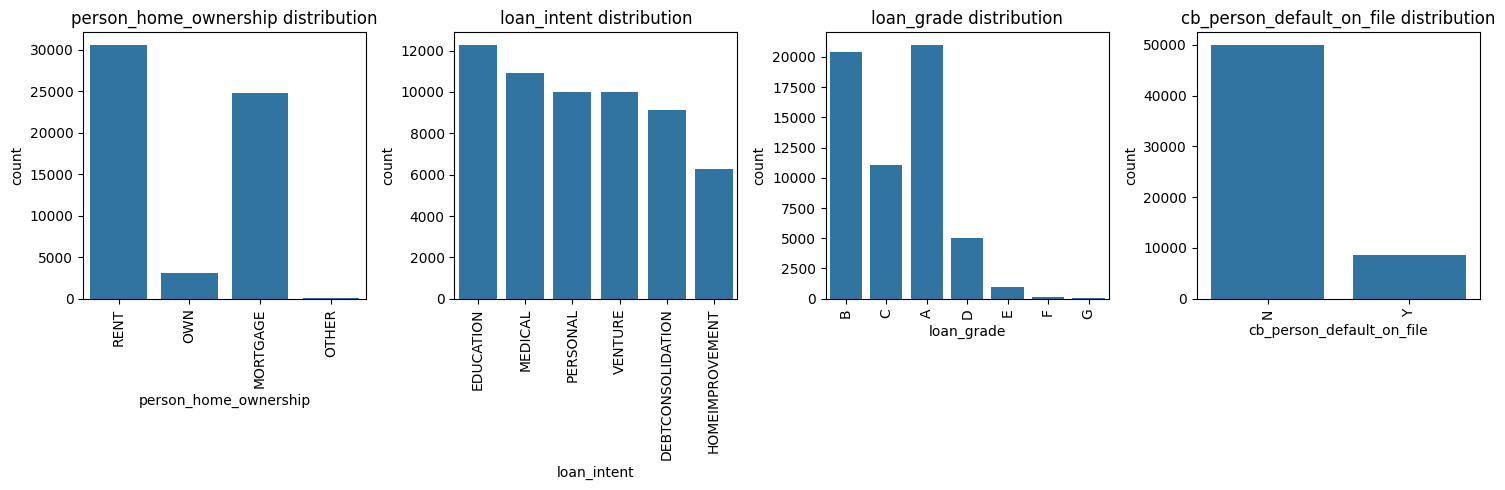

In [85]:
_,ax = plt.subplots(nrows=1,ncols=4,figsize=(15,5))

for idx,col in enumerate(cat_cols):
  d=sns.countplot(data=train_df,x=col,ax=ax[idx])
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
  ax[idx].set_title(f"{col} distribution")
  plt.tight_layout()


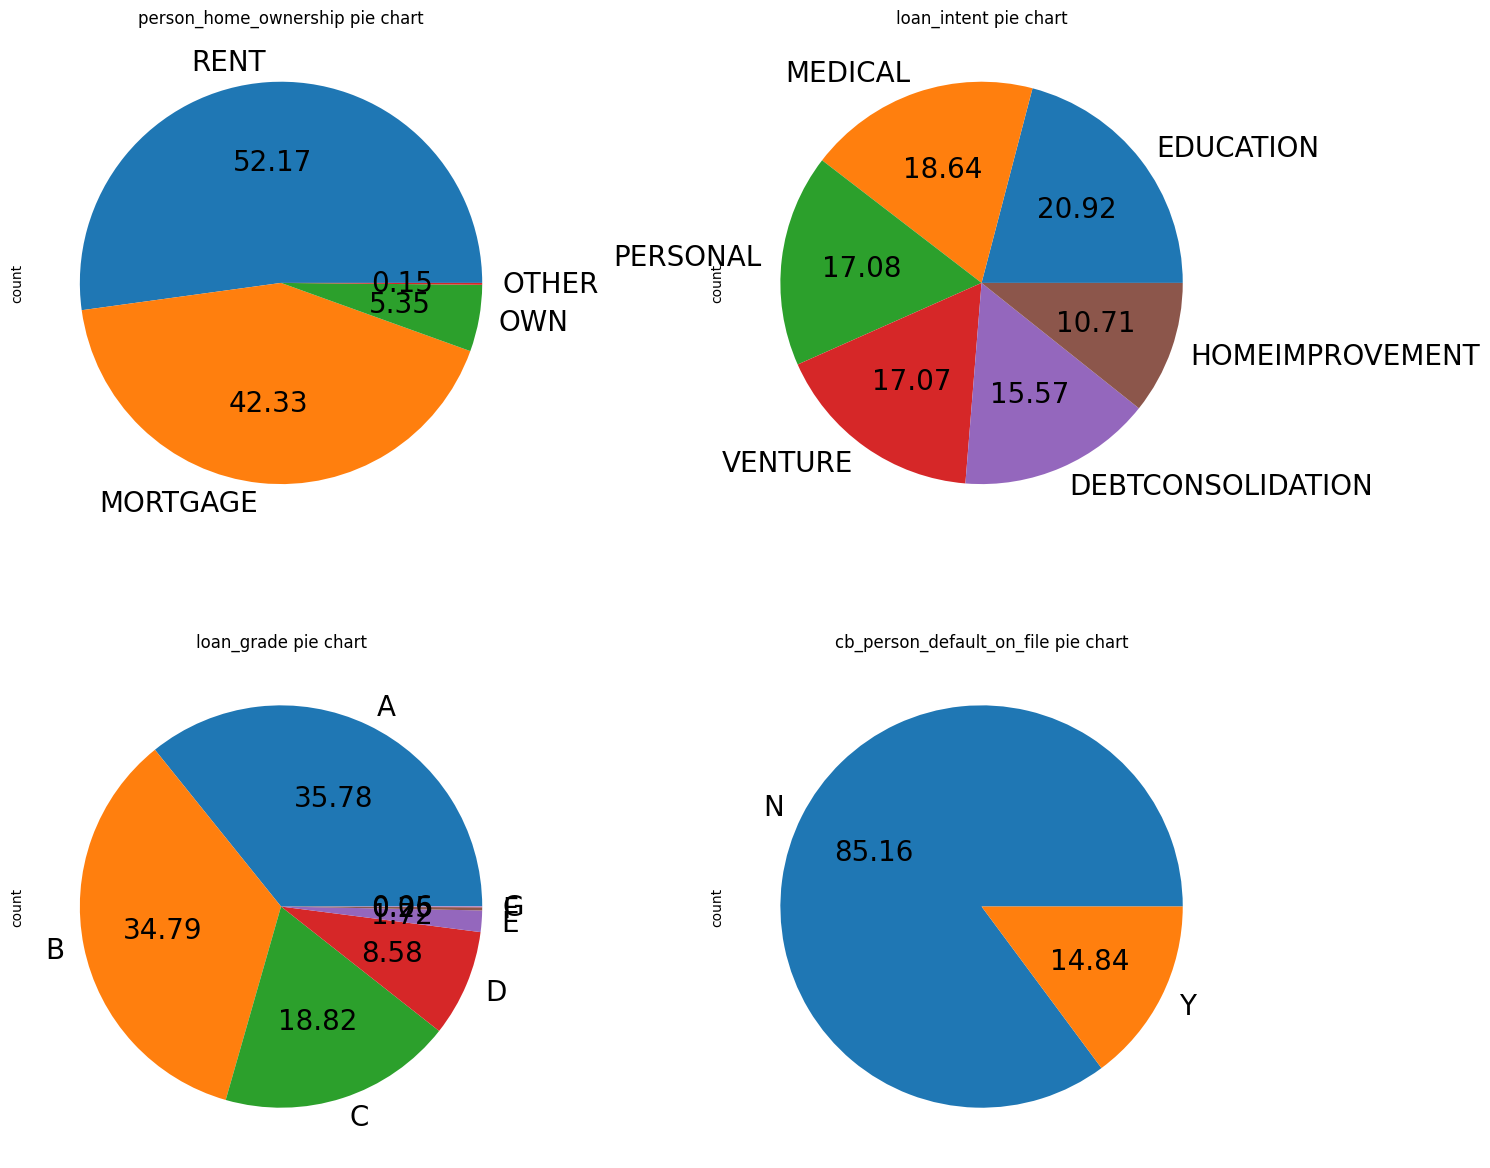

In [89]:
_,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))

for index,col in enumerate(cat_cols):
    r = index // 2 # floor diviion rounds value to nearest integer
    c = index%2    # remainder of a division operation
    train_df[col].value_counts().plot(kind="pie", autopct="%.2f", ax=ax[r][c],fontsize=20)
    ax[r][c].set_title(f"{col} pie chart")
    plt.tight_layout()

<ipython-input-79-e1ac4b06ec65>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
<ipython-input-79-e1ac4b06ec65>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
<ipython-input-79-e1ac4b06ec65>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
<ipython-input-79-e1ac4b06ec65>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(d.get_xticklabels(),rotation=90)


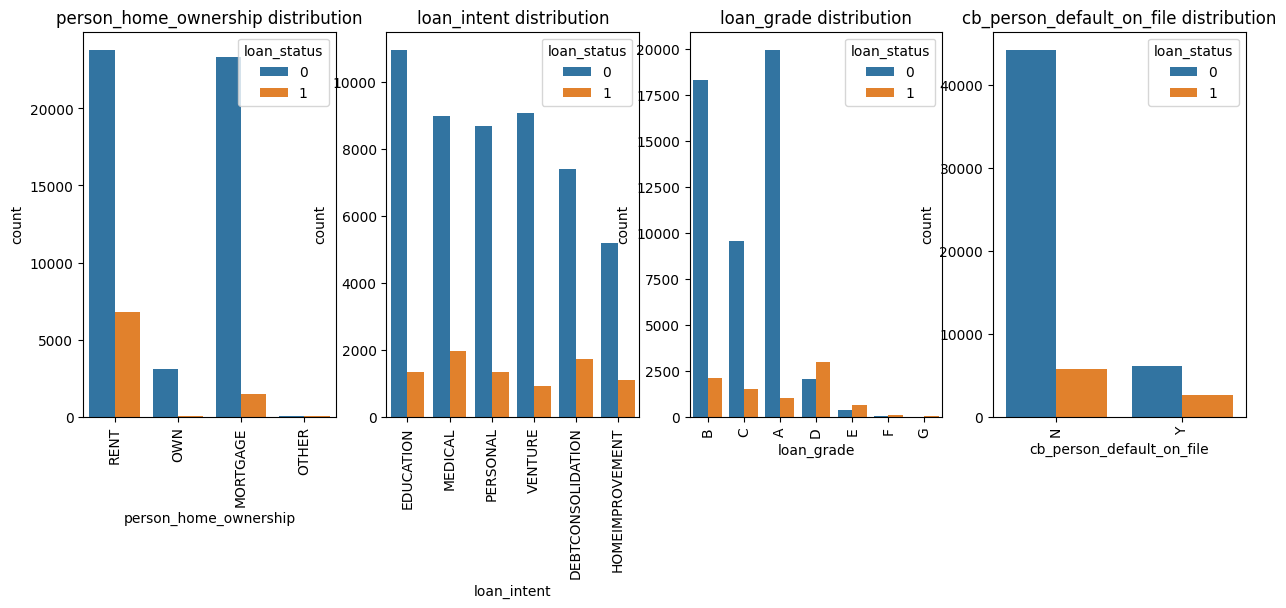

In [79]:
_,ax = plt.subplots(nrows=1,ncols=4,figsize=(15,5))

for idx,col in enumerate(cat_cols):
  d=sns.countplot(data=train_df,x=col,ax=ax[idx],hue='loan_status')
  d.set_xticklabels(d.get_xticklabels(),rotation=90)
  ax[idx].set_title(f"{col} distribution")


<Axes: >

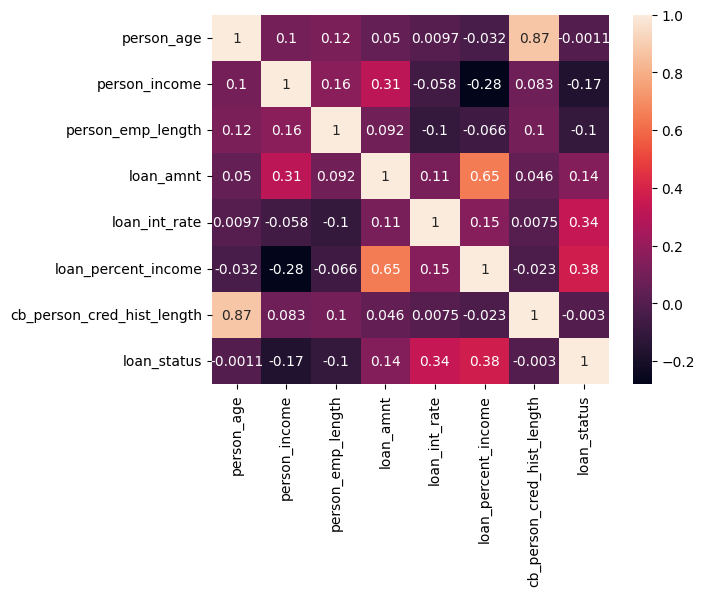

In [44]:
sns.heatmap(train_df.corr(numeric_only=True), annot=True)

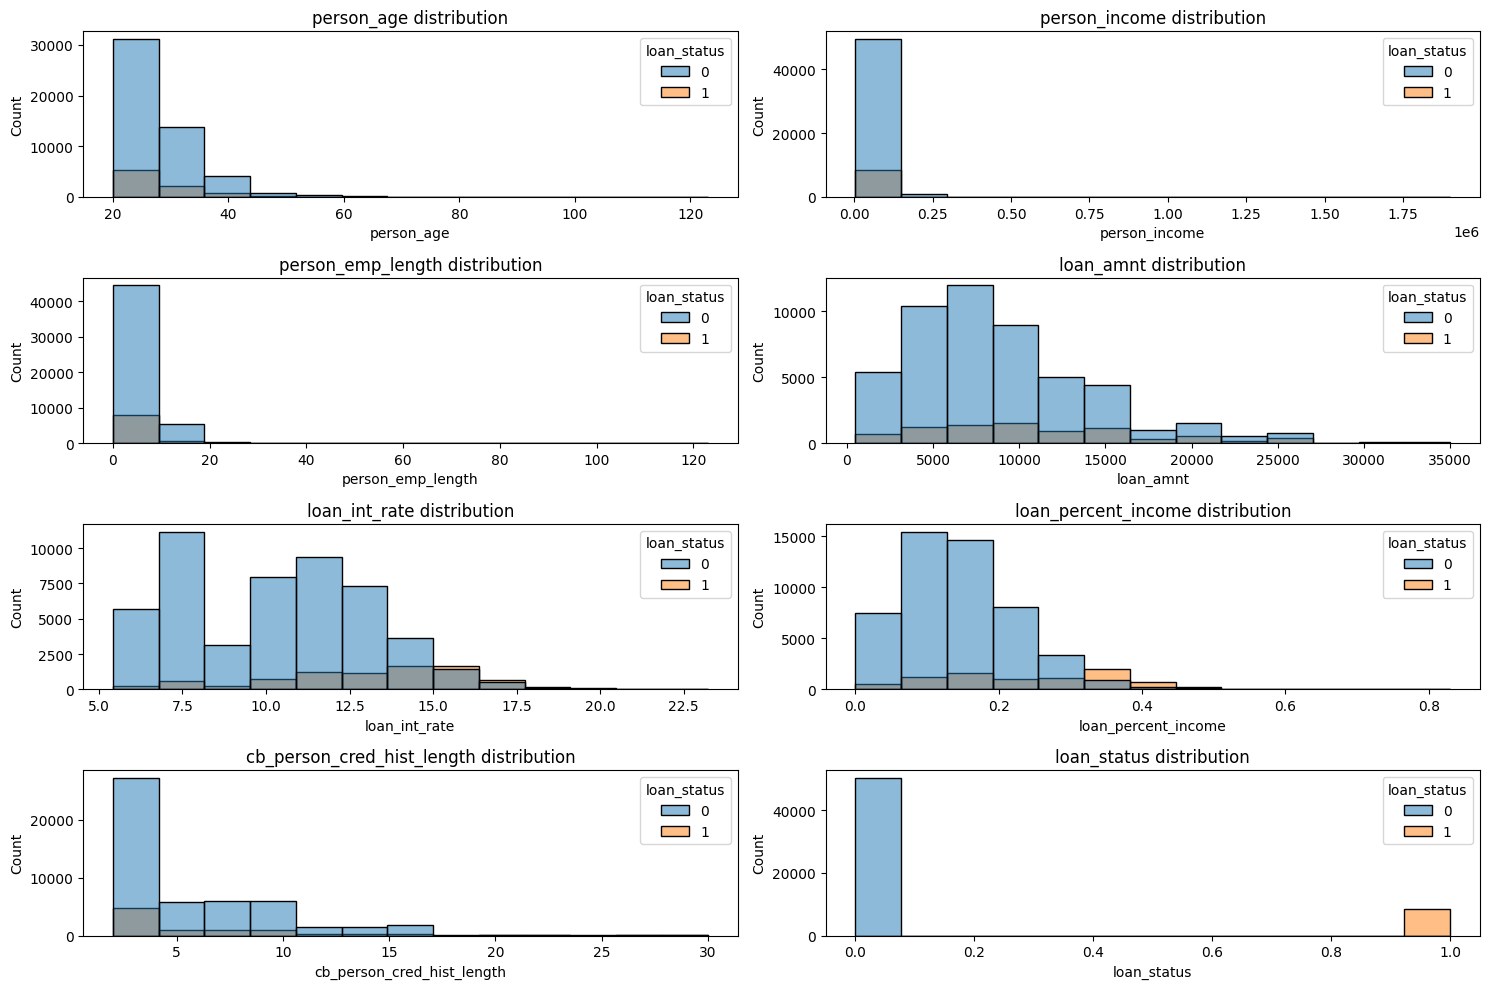

In [84]:
_,ax = plt.subplots(nrows=4,ncols=2,figsize=(15,10))

for idx,col in enumerate(num_cols):
  r= idx//2
  c=  idx%2
  # print(r,c)
  sns.histplot(data=train_df,x=col,hue='loan_status',ax=ax[r][c],bins=13)
  ax[r][c].set_title(f"{col} distribution")
  plt.tight_layout()


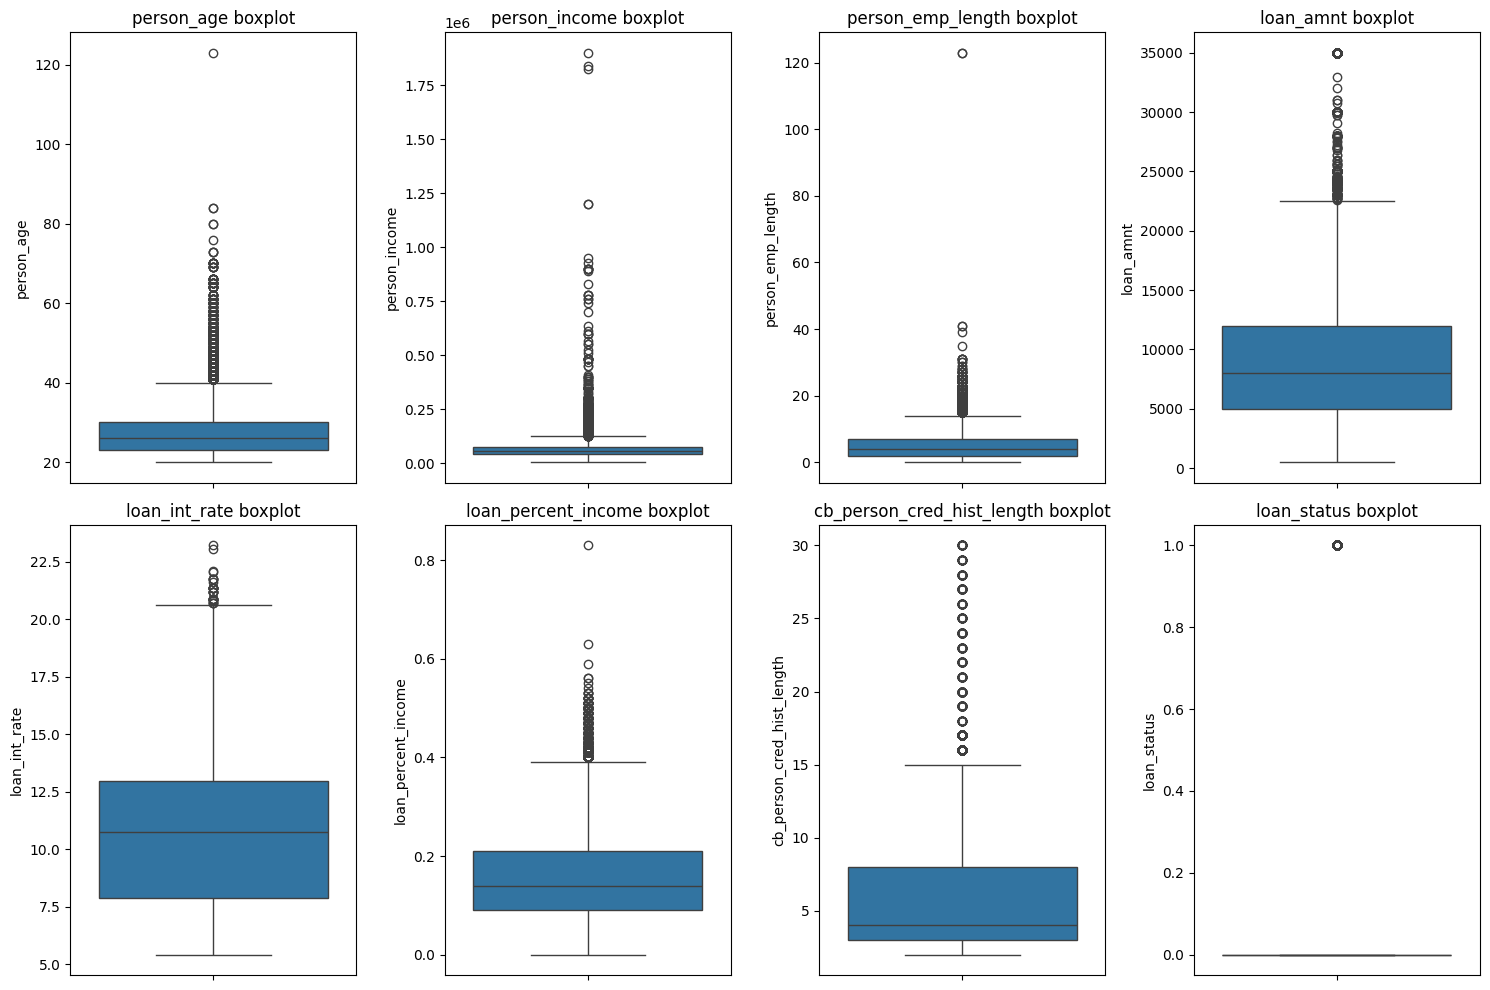

In [77]:
_,ax= plt.subplots(nrows=2,ncols=4,figsize=(15,10))

for idx,col in enumerate(num_cols):
  r= idx//4
  c= idx%4
  # print(r,c)
  sns.boxplot(y=train_df[col],ax=ax[r][c])
  ax[r][c].set_title(f"{col} boxplot")
  plt.tight_layout()

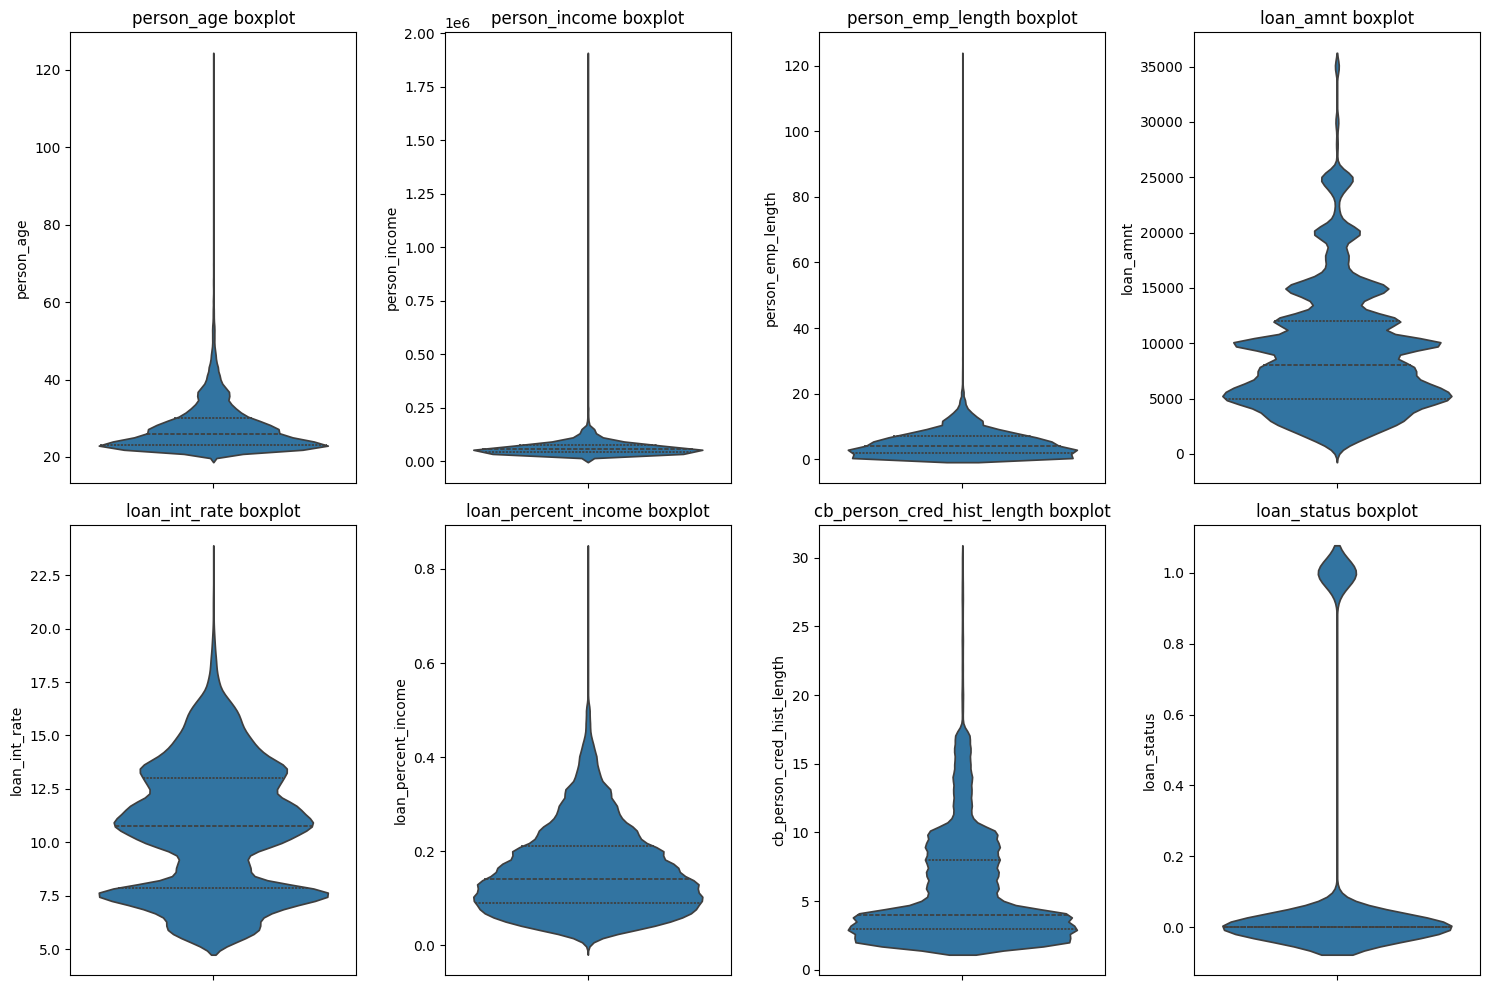

In [76]:
_,ax= plt.subplots(nrows=2,ncols=4,figsize=(15,10))

for idx,col in enumerate(num_cols):
  r= idx//4
  c= idx%4
  # print(r,c)
  sns.violinplot(data= train_df,y=train_df[col],inner='quartile',ax=ax[r][c])
  ax[r][c].set_title(f"{col} boxplot")
  plt.tight_layout()

# a lot outliers and unbalanced target but still we wont brind any change to it

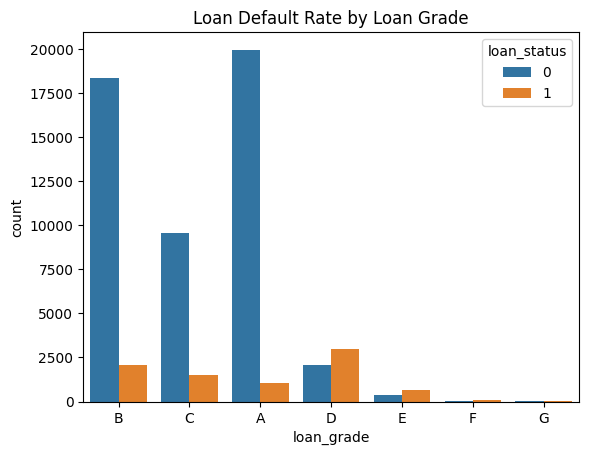

In [74]:
sns.countplot(data=train_df, x='loan_grade', hue='loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()
